# Regresión de dos formas

Sigamos profundizando en estos datos.
Se creo un dataframe de Pandas y se hicieron pruebas con parte del conjunto de datos original, estandarizando el precio de la fanega. Haciéndolo, sólo se reunio alrededor de 400 puntos de datos y sólo para los meses de otoño.

Los datos están precargados con un gráfico de dispersión inicial para mostrar datos mensuales. Quizá podamos obtener un poco más de detalle acerca de la naturaleza de los datos limpiándolos más.

- Mostrar la relación de las variables. Mostrar la relación entre las variables
- Realizar predicciones. Hacer predicciones precisas en donde un nuevo punto de datos caería en relación a esa línea.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

pumpkins = pd.read_csv('../Data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Precios de la calabaza
Cargue las bibliotecas y el conjunto de datos necesarios. Convierta los datos en una trama de datos que contenga un subconjunto de los datos:

- Solo consigue calabazas a un precio por fanega
- Convertir la fecha en un mes
- Calcule el precio para que sea un promedio de precios altos y bajos
- Convertir el precio para reflejar el precio por cantidad de bushel
- Importar pandas como PD

In [32]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_29456\3541252711.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


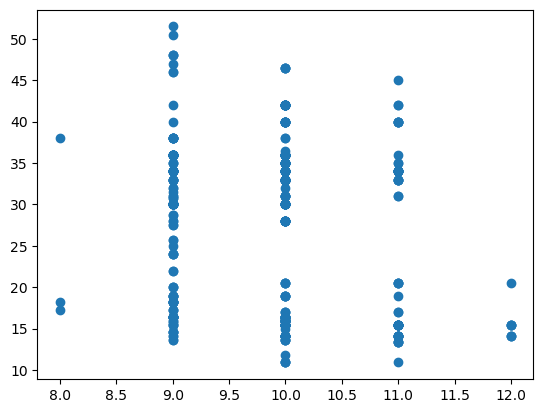

In [33]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

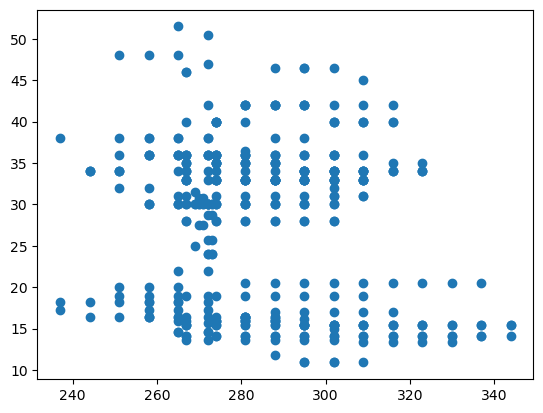

In [34]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

Se agrego una biblioteca de Scikit-learn para convertir automáticamente todos los datos de cadena a números

In [35]:
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,1,5,3,1,0,5.0,3.0,13.636364
71,1,5,3,1,0,10.0,7.0,16.363636
72,2,11,3,1,0,10.0,7.0,16.363636
73,2,11,3,1,0,9.0,6.0,15.454545
74,2,12,3,1,0,5.0,3.0,13.636364
...,...,...,...,...,...,...,...,...
1738,1,10,1,9,2,5.0,3.0,30.000000
1739,1,10,1,9,2,3.0,3.0,28.750000
1740,1,10,1,9,2,0.0,3.0,25.750000
1741,1,10,1,9,2,1.0,0.0,24.000000


Si ahora se mira el nuevo dataframe new_pumpkins, se puede observar que todas las cadenas ahora son numéricas. ¡Esto se dificulta al leer pero lo hace más comprensible para Scikit-learn! Ahora se puede tomar decisiones más informadas (no sólo basado en un gráfico de dispersión) acerca de los datos que mejor se ajustan a la regresión.

Intentamos encontrar una buena correlación entre dos puntos de los datos para construir potencialmente un buen modelo predictivo. Como resultado, sólo hay correlación débil entre la Ciudad y el Precio.

### Construyendo un modelo lineal

Antes de construir el modelo, hacemos una limpieza más a los datos. Se elimina cualquier dato nulo y verifica una vez cómo lucen los datos.

In [36]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   DayOfYear   415 non-null    int64  
 2   Variety     415 non-null    object 
 3   City        415 non-null    object 
 4   Package     415 non-null    object 
 5   Low Price   415 non-null    float64
 6   High Price  415 non-null    float64
 7   Price       415 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 45.3+ KB


Luego, se crea un dataframe nuevo de este conjunto mínimo para imprímirlo:

In [37]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins

,Package,Price
70,0,13.636364
71,0,16.363636
72,0,16.363636
73,0,15.454545
74,0,13.636364
...,...,...
1738,2,30.000000
1739,2,28.750000
1740,2,25.750000
1741,2,24.000000


1. Ahora se puede asignar tus datos de codificadas X e Y:

In [38]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

Se está usando la notación slice de Python para crear arreglos y así poblar X e Y.

2. Lo siguiente es, iniciar las rutinas de construcción del modelo de regresión:

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.33153423279989847


Debido a que la aceleración nos es particularmente buena, el modelo producido no es terriblemente preciso.

3. Se puede visualizar la línea dibujada en el proceso:

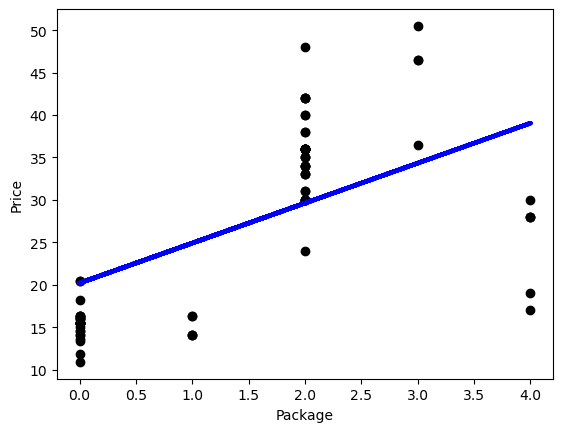

In [40]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

4. Se prueba el modelo contra una variedad hipotética:

In [41]:
lin_reg.predict( np.array([ [2.75] ]) )

array([[33.15655975]])

Ese número hace sentido, si la lógica de la regresión lineal es cierta.

🎃 Se acaba de crear un modelo que puede ayudara a predecir el precio de unas pocas variedades de calabazas. la parcela de calabazas de días festivos serán hermosas. ¡Pero probablemente puedas crear un mejor modelo!

### Regresión polinómica

Otro tipo de regresión lineal es la regresión polinomial. Mientras algunas veces existe una relación lineal entre las variables - entre más grande el volumen de la calabaza, mayor el precio - algunas veces estas relaciones no pueden ser graficadas como un plano o línea recta.

La regresión polinomial crea una línea curva para ajustar mejor los datos no lineales.

1. Recreemos un dataframe poblado con un segmento de los datos originales de las calabazas:

In [42]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.636364
71,1,3,1,0,16.363636
72,2,3,1,0,16.363636
73,2,3,1,0,15.454545
74,2,3,1,0,13.636364
...,...,...,...,...,...
1738,1,1,9,2,30.000000
1739,1,1,9,2,28.750000
1740,1,1,9,2,25.750000
1741,1,1,9,2,24.000000


Una buena forma de visualizar las correlaciones entre los datos en los dataframes es mostrarlos en una gráfica 'coolwarm':

2. Usa el método Background_gradient()con coolwarmcomo valor de su argumento:

In [43]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.606171
Price,-0.148783,-0.863479,0.323640,0.606171,1.000000


Viendo esta gráfica, se puede visualizar la buena valoración entre Paquete y Precio. Así que deberías ser capaz de crear un modelo algo mejor que el anterior.

### Crea un oleoducto

Scikit-learn incluye una API útil para crear modelos de regresión polinomail - la API make_pipeline . Se crea un 'pipeline' que es una cadena de estimadores. En este caso, el ducto incluye características polinomiales, o predicciones que forman un camino no lineal.

1. Construye las columnas X e Y:

In [44]:
X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values

2. Crea el pipeline llamando al método make_pipeline():

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred=pipeline.predict(X_test)

Crea una secuencia
En este punto, se necesita crear un nuevo dataframe con datos ordenados para que así el pipeline pueda crear una secuencia.

Se crea un nuevo dataframe llamando pd.DataFrame. Luego se ordenaron los valores al llamar a la funcion sort_values(). Finalmente crea un polinomio gráfico:

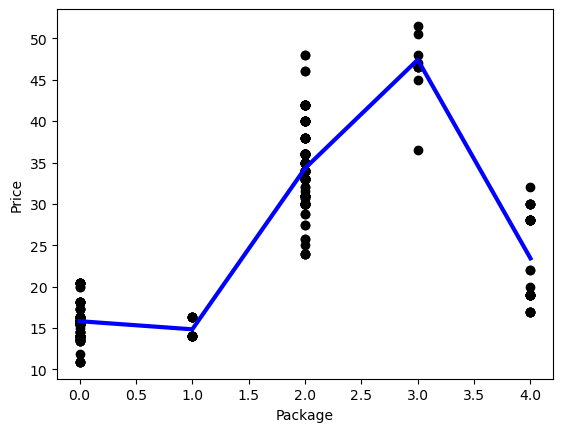

In [46]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color="black")
plt.show()

La línea curva que se ajusta mejor a los datos.

Revisamos la precisión del modelo:

In [47]:
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8537946517073784


#### Hacemos una predicción
¿Podemos ingresar un nuevo valor y obtener una predicción?

Llamamos a predict() para hacer una predicción:

In [48]:
pipeline.predict( np.array([ [2.75] ]) )

array([[46.34509342]])

¡Hace sentido, dado el gráfico! Y, si este es un mejor modelo que el anterior, viendo los mismos datos, ¡necesitas presuponer para estas calabazas más caras!

Se crearon dos modelos de regresión en. En la sección final de regresión, se tratara la regresión logística para determinar categorías.

![image](https://github.com/Yoel-Gasca/Machine-Learning-Lesons/assets/83617933/5470ea97-3b9c-4dbe-b284-cb82cae93a44)